# Lab5: Neural Networks

Students: Gonzalo Quintana and Tales Marra

## 1 - Linear Regression

Here we implement the code for the linear regression:

xshape= (100,)
xxshape= (100, 2)
yshape= (100,)
wshape= (2, 1)


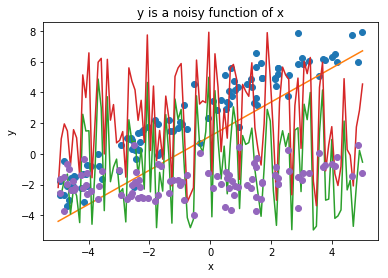

In [428]:
# Libraries: Standard ones
import numpy as np
import matplotlib.pyplot as plt
# seed the pseudorandom number generator to reproduce results
from numpy.random import seed
from numpy.random import randn
from numpy.random import uniform

# input size

N = 100

# seed the pseudorandom number generator

seed(1255)

# generate random data in which y is a noisy function of x

x = uniform(-5,5,N)
y = x + randn(N) + 3
xplot = np.linspace(-5,5,N);
plt.plot(x,y,"o")
plt.ylabel("y")
plt.xlabel("x")
plt.title("y is a noisy function of x")

#plt.show()
# Matrix of predictors

x_m = np.copy(x)

# Add column of 1s for intercept coefficient

intercept = np.ones(N)
xx = np.concatenate((intercept[np.newaxis,:],x_m[np.newaxis,:]),axis=0)
xx = np.transpose(xx)

# Initialise w matrix

w = 0.1 * randn(np.shape(xx)[1]);
w= w[np.newaxis,:];
w = np.transpose(w)
print("xshape=",np.shape(x))
print("xxshape=",np.shape(xx))
print("yshape=",np.shape(y))
print("wshape=",np.shape(w))
nb_epoch = 200
lr = 0.01
y = y[np.newaxis,:];
y = np.transpose(y)
err = []

for i in range(nb_epoch):
    
    y_hat = np.dot(xx,w)
    
    delta = y - y_hat
    
    cost = np.mean(np.square(delta))
    
    gradient = -2*np.mean(np.multiply(delta,xx))
    
    w_plus = w - lr * gradient
    
    w = w_plus
    
    err.append(cost)

    
   
aline=w[0]+w[1]*xplot
#print(aline)
#plt.figure(figsize= (12,8))
plt.plot(xplot,aline,xplot,x,xplot,y)
residus = np.dot(xx,w) - y
plt.plot(x,residus,"o")
plt.show()

In [429]:
print('The final value of the weights is: ')
print(w)

The final value of the weights is: 
[[1.15356722]
 [1.10967256]]


## 2 - Feed-Forward Neural Net

In [79]:
#X = input data
# y = output data
xAll = np.array(([3, 9], [1, 6], [4, 5], [5, 10]), dtype=float)
y = np.array(([18.2], [16], [17.5]), dtype=float)

normalizationxAll = xAll/np.amax(xAll, axis=0)
y = y/20
normalizedxtrain = normalizationxAll[0:3]

Here we  print the nomalized data:

In [80]:
print(normalizationxAll)
print(y)

[[0.6 0.9]
 [0.2 0.6]
 [0.8 0.5]
 [1.  1. ]]
[[0.91 ]
 [0.8  ]
 [0.875]]


If you want to test with the weights from question 3, you can just uncomment (1) and (2) and comment (3) and (4).

In [408]:
class Neural_Network():
    def __init__(self, inputSize, hiddenSize, outputSize, learning_rate):
        #parameters
        self.inputSize = inputSize
        self.outputSize = outputSize
        self.hiddenSize = hiddenSize
        self.learning_rate = learning_rate
        #add the bias as a neuron always set to 1
        self.inputSize = self.inputSize + 1
        self.hiddenSize = self.hiddenSize + 1
        #weights
        # weight matrix from input to hidden layer
        self.W1 = np.random.randn(self.inputSize, self.hiddenSize) #(3)
        #self.W1 = 0.3*np.ones((self.inputSize, self.hiddenSize)) (1)
        # weight matrix from hidden to output layer
        self.W2 = np.random.randn(self.hiddenSize, self.outputSize)#(4)
        #self.W2 = 0.5*np.ones((self.hiddenSize, self.outputSize)) (2)
        
    def activation_function(self, s):
        # activation function
        return 1/(1+np.exp(-s))
        
    def sigmoidPrime(self, s):
        # activation function
        return self.activation_function(s)*(1-self.activation_function(s))
    
    def feedforward(self, X):
        # forward propagation through our network

        # add the bias to the first input neuron
        bias=np.ones((np.shape(X)[0],1))
        X_bias = np.concatenate((bias, X), axis=1)
        # compute output for hidden layer
        # dot product of X (input) and weight matrix from input to hidden layer
        self.h_pot = np.dot(X_bias, self.W1)
        # activation function
        self.h_out = self.activation_function(self.h_pot)
        # set to 1 the bias neuron on hidden layer
        self.h_out[:,0] = np.ones(np.shape(self.h_out)[0]);
        # activation function
        # dot product of hidden layer output (out_h) and weight matrix from hidden to outputlayer
        self.o_pot = np.dot(self.h_out, self.W2)
        # activation function
        self.o_out = self.activation_function(self.o_pot)
        return self.o_out 
    
    def backward(self, X, y, output):
        
        # backward propagate through the network
        # error in output
        self.o_error = y - output
        
        # applying derivative of activation function to error
        self.o_delta = self.o_error * self.sigmoidPrime(output)
        
        # h_error: how much our hidden layer weights contributed to output error
        self.h_error = self.o_delta.dot(self.W2.T)
        
        # applying derivative of activation function to hidden error
        
        self.h_delta = self.h_error*self.sigmoidPrime(self.h_out)
        bias=np.ones((np.shape(X)[0],1))
        input_layer = np.concatenate((bias, X), axis=1)
        
        # adjusting first set (input --> hidden) weights
        
        self.W1 += input_layer.T.dot(self.h_delta) * self.learning_rate
        
        self.W2 += self.h_out.T.dot(self.o_delta) * self.learning_rate
        
        return abs(self.o_error)
        
    def learn(self,X,y):
        
        y_hat = self.feedforward(X)
        error = self.backward(X,y,y_hat)
        
        return error
    
    def predict(self,x):
        
        return self.feedforward(x)
    
    #def predict_classes(self,x):
        
        #self.predict(x)
    


Question 3: (result)

In [409]:
lr = 0.1

NN = Neural_Network(2,3,1,lr)

y_hat = NN.feedforward(normalizationxAll)

print(y_hat)

[[0.31057546]
 [0.32648216]
 [0.34652375]
 [0.31422988]]


As demanded in question 4, the derivaitve of the activation function is:

$\sigma ' (s) = \sigma (s) (1-\sigma (s))$    

We have implemented the learn and sigmoidPrime functions directly on the class.

Here we train the network:

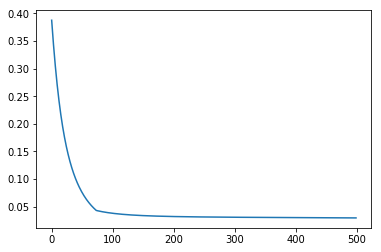

In [410]:
epoch = 500
plot_error = np.zeros(epoch)

# initialization

lr = 0.1
NN = Neural_Network(2,3,1,lr)

# trains the NN <<epoch>> times

for i in range(epoch):

    error = NN.learn(normalizedxtrain,y)
    
    error = np.mean(np.array(error))
    
    plot_error[i] = error
    
plt.plot(plot_error)
plt.show()

Question 7: here we show the predictions:

In [411]:
xtest = normalizationxAll[3]

y_hat = NN.predict(normalizationxAll)

print(y_hat*20)

[[17.48870617]
 [16.8819643 ]
 [17.30395355]
 [17.69656287]]


## Iris Dataset

Splitting into 90/10:

In [412]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

data = load_iris()

X_train, X_test, y_train, y_test = train_test_split(data['data'],data['target'], test_size=0.1, random_state=42, shuffle=True)

In [413]:
X_train.shape
y_train.shape

(135,)

0.24009080237434313


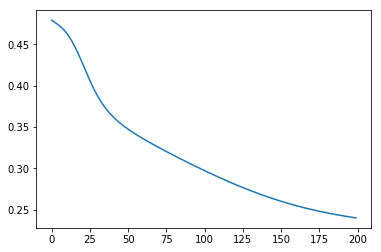

In [414]:
epoch = 200
plot_error = np.zeros(epoch)

# initialization

lr = 0.001
NN = Neural_Network(4,8,1,lr)

#normalizing

ynorm_tr = y_train.reshape(len(y_train),1)/2
ynorm_test = y_test.reshape(len(y_test),1)/2

# trains the NN <<epoch>> times

for i in range(epoch):

    error = NN.learn(X_train,ynorm_tr)
    
    error = np.mean(np.array(error))
    
    plot_error[i] = error
    
print(error)
    
plt.plot(plot_error)
plt.show()

In [415]:
### Predicting for the test dataset

In [416]:
def calculate_acc():
    preds = NN.predict(X_test)
    predn =[]
    for el in preds:
        if el>0.333:
            if el>0.67:
                predn.append(1)
            else:
                predn.append(0.5)
        else:
            predn.append(0)
            
    ypredn = np.array(predn).reshape(len(ynorm_test),1)
            
    return np.mean(((ynorm_test-ypredn)==0).astype(np.float))
            


In [417]:
print('accuracy: ',calculate_acc())

accuracy:  0.8


Splitting into 66/33:

In [418]:
X_train, X_test, y_train, y_test = train_test_split(data['data'],data['target'], test_size=0.33, random_state=42, shuffle=True)

0.25918845322124345


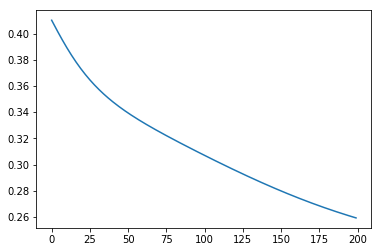

In [423]:
epoch = 200
plot_error = np.zeros(epoch)

# initialization

lr = 0.001
NN = Neural_Network(4,8,1,lr)

#normalizing

ynorm_tr = y_train.reshape(len(y_train),1)/2
ynorm_test = y_test.reshape(len(y_test),1)/2

# trains the NN <<epoch>> times

for i in range(epoch):

    error = NN.learn(X_train,ynorm_tr)
    
    error = np.mean(np.array(error))
    
    plot_error[i] = error
    
print(error)
    
plt.plot(plot_error)
plt.show()

In [424]:
print('accuracy: ',calculate_acc())

accuracy:  0.54


As expected, when using less data for training the results get worse.